In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the provided Excel file
file_path ='/content/drive/My Drive/shared_FG/CompleteDataset.xlsx'
df = pd.read_excel(file_path)

labels = df['Label']
neurons = df.drop('Label', axis=1)

neurons.head()

,Area,Spine Density,Number of Primary Dendrite,Number of Secondary Dendrites,Mean Length of primary dendrites,Mean Length of secondary dendrites
0,67.550,1.25,5,9,40.71,70.86
1,71.208,1.98,7,9,42.10,70.53
2,73.000,1.22,6,8,36.50,92.50
3,84.250,2.68,9,15,40.96,69.38
4,89.520,2.84,8,13,49.62,71.60


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

#PCA
# standardization
scaler = StandardScaler()
neurons_standardized = scaler.fit_transform(neurons)

# 4 componenets allow us to retain 95% of the variance
n_components = 4

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(neurons_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
final_df = pd.concat([principal_df], axis=1)

In [ ]:
final_df

,PC1,PC2,PC3,PC4
0,-3.483752,-1.911956,-1.875510,0.455829
1,-2.525770,-0.848414,-0.405514,-0.005650
2,-2.813201,-2.398868,-1.636203,-0.345477
3,-1.039950,-0.519141,1.712606,0.496660
4,-1.101093,-0.115947,0.764954,0.776024
5,-0.792704,-0.122433,1.036360,-0.139461
6,-0.543421,-0.572194,1.674566,-0.662803
7,-0.880337,-1.239548,0.962106,-0.348897
8,-0.876733,-1.053778,0.475021,-0.884654
9,-0.251152,-0.254108,1.887049,-0.226932


In [ ]:
!pip install scipy matplotlib seaborn

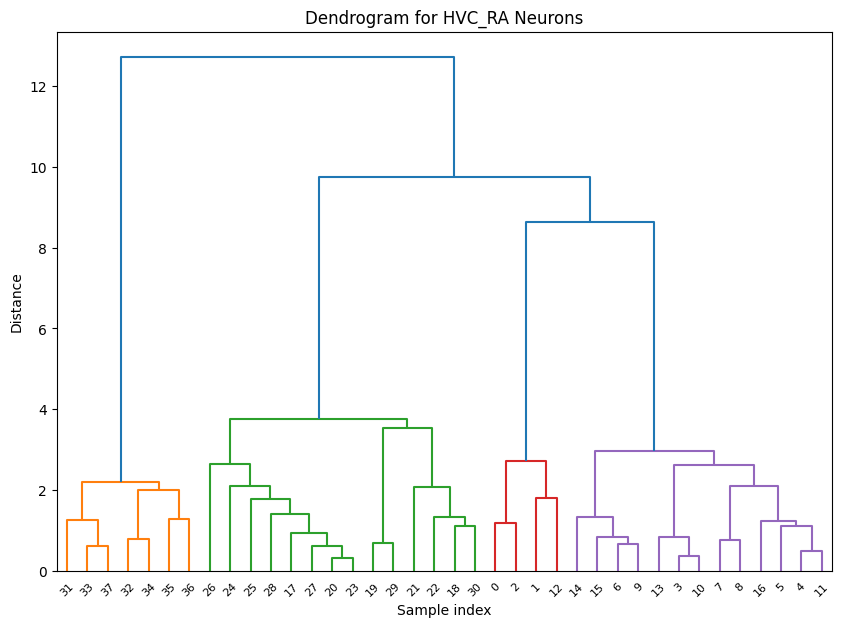

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# hierarchical clustering
linkage_matrix = linkage(final_df, method='ward')

# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, color_threshold = 5 , distance_sort=True)
plt.title("Dendrogram for HVC_RA Neurons")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


0.41420588418187365
0.39597712569567706
0.45690190637188294
0.3832971110723622
0.38406957026078425
0.32607813230184857
0.3158554626057543


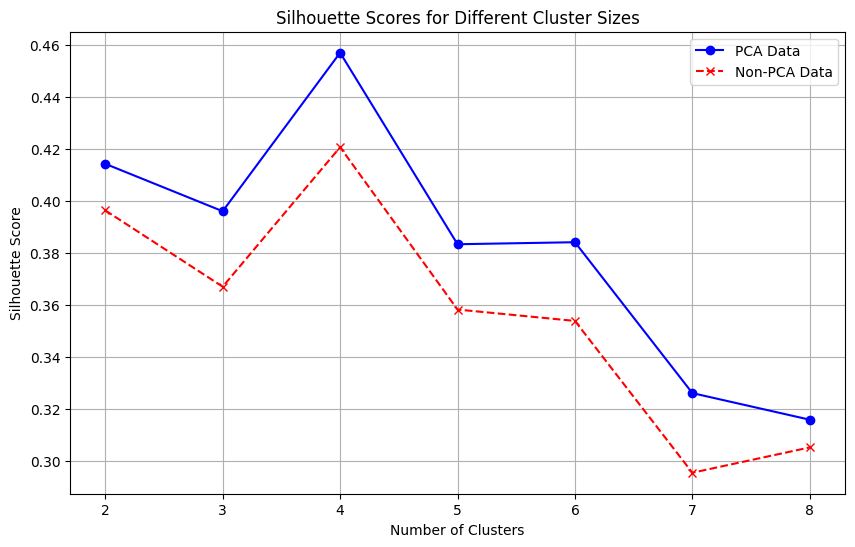

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

data_pca = final_df
data_non_pca = neurons_standardized

# hierarchical clustering
linkage_matrix_pca = linkage(data_pca, method='ward')
linkage_matrix_non_pca = linkage(data_non_pca, method='ward')

cluster_sizes = range(2, 9)

silhouette_scores_pca = []
silhouette_scores_non_pca = []

for k in cluster_sizes:
    # PCA data
    clusters_pca = fcluster(linkage_matrix_pca, k, criterion='maxclust')
    silhouette_pca = silhouette_score(data_pca, clusters_pca)
    silhouette_scores_pca.append(silhouette_pca)
    print(silhouette_pca)

    # Non-PCA data
    clusters_non_pca = fcluster(linkage_matrix_non_pca, k, criterion='maxclust')
    silhouette_non_pca = silhouette_score(data_non_pca, clusters_non_pca)
    silhouette_scores_non_pca.append(silhouette_non_pca)

plt.figure(figsize=(10, 6))
plt.plot(cluster_sizes, silhouette_scores_pca, marker='o', linestyle='-', color='b', label="PCA Data")
plt.plot(cluster_sizes, silhouette_scores_non_pca, marker='x', linestyle='--', color='r', label="Non-PCA Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Cluster Sizes")
plt.grid(True)
plt.legend()
plt.show()


Elbow method:

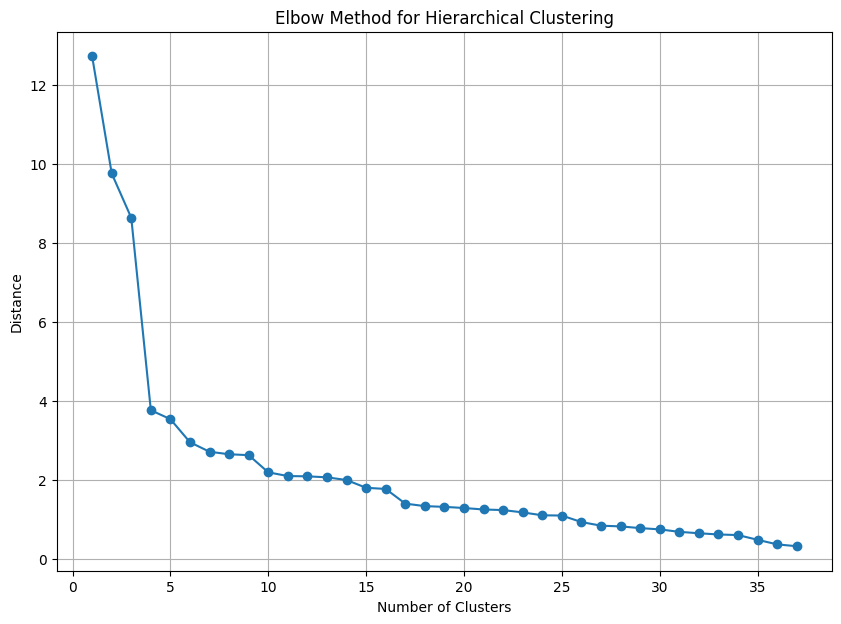

In [ ]:
distances = linkage_matrix[:, 2]
num_clusters = np.arange(1, len(distances) + 1)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(num_clusters, distances[::-1], marker='o')
plt.title("Elbow Method for Hierarchical Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.grid(True)

plt.show()


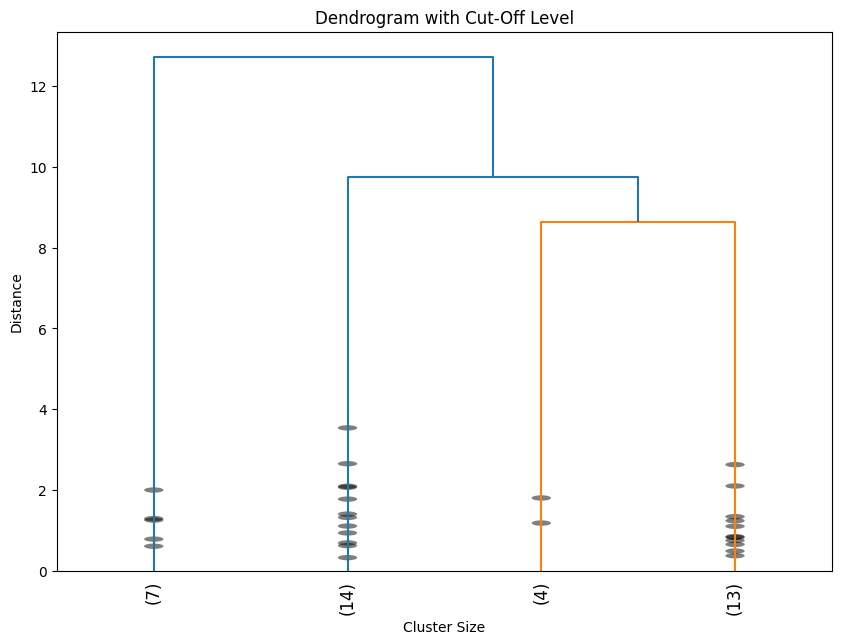

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(final_df, method='ward')

# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=4,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True,
)
plt.title("Dendrogram with Cut-Off Level")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

clustered_df = final_df.copy()
clustered_df['cluster'] = clusters
print(clustered_df)

         PC1       PC2       PC3       PC4  cluster
0  -3.483752 -1.911956 -1.875510  0.455829        3
1  -2.525770 -0.848414 -0.405514 -0.005650        3
2  -2.813201 -2.398868 -1.636203 -0.345477        3
3  -1.039950 -0.519141  1.712606  0.496660        4
4  -1.101093 -0.115947  0.764954  0.776024        4
5  -0.792704 -0.122433  1.036360 -0.139461        4
6  -0.543421 -0.572194  1.674566 -0.662803        4
7  -0.880337 -1.239548  0.962106 -0.348897        4
8  -0.876733 -1.053778  0.475021 -0.884654        4
9  -0.251152 -0.254108  1.887049 -0.226932        4
10 -0.801610 -0.347184  1.713924  0.718999        4
11 -0.771480 -0.264435  0.479014  0.626554        4
12 -2.578214 -0.396876 -1.656595 -1.216919        3
13 -0.386595 -0.069935  1.708396  0.909082        4
14 -0.274897  0.615018  1.240244 -0.867295        4
15 -0.144625 -0.290449  1.261188 -0.871393        4
16 -1.414658 -0.734328  0.196236  0.101015        4
17 -0.520083  2.282370 -0.572699 -0.016898        2
18  0.871746

In [ ]:
final_df

,PC1,PC2,PC3,PC4
0,-3.483752,-1.911956,-1.875510,0.455829
1,-2.525770,-0.848414,-0.405514,-0.005650
2,-2.813201,-2.398868,-1.636203,-0.345477
3,-1.039950,-0.519141,1.712606,0.496660
4,-1.101093,-0.115947,0.764954,0.776024
5,-0.792704,-0.122433,1.036360,-0.139461
6,-0.543421,-0.572194,1.674566,-0.662803
7,-0.880337,-1.239548,0.962106,-0.348897
8,-0.876733,-1.053778,0.475021,-0.884654
9,-0.251152,-0.254108,1.887049,-0.226932


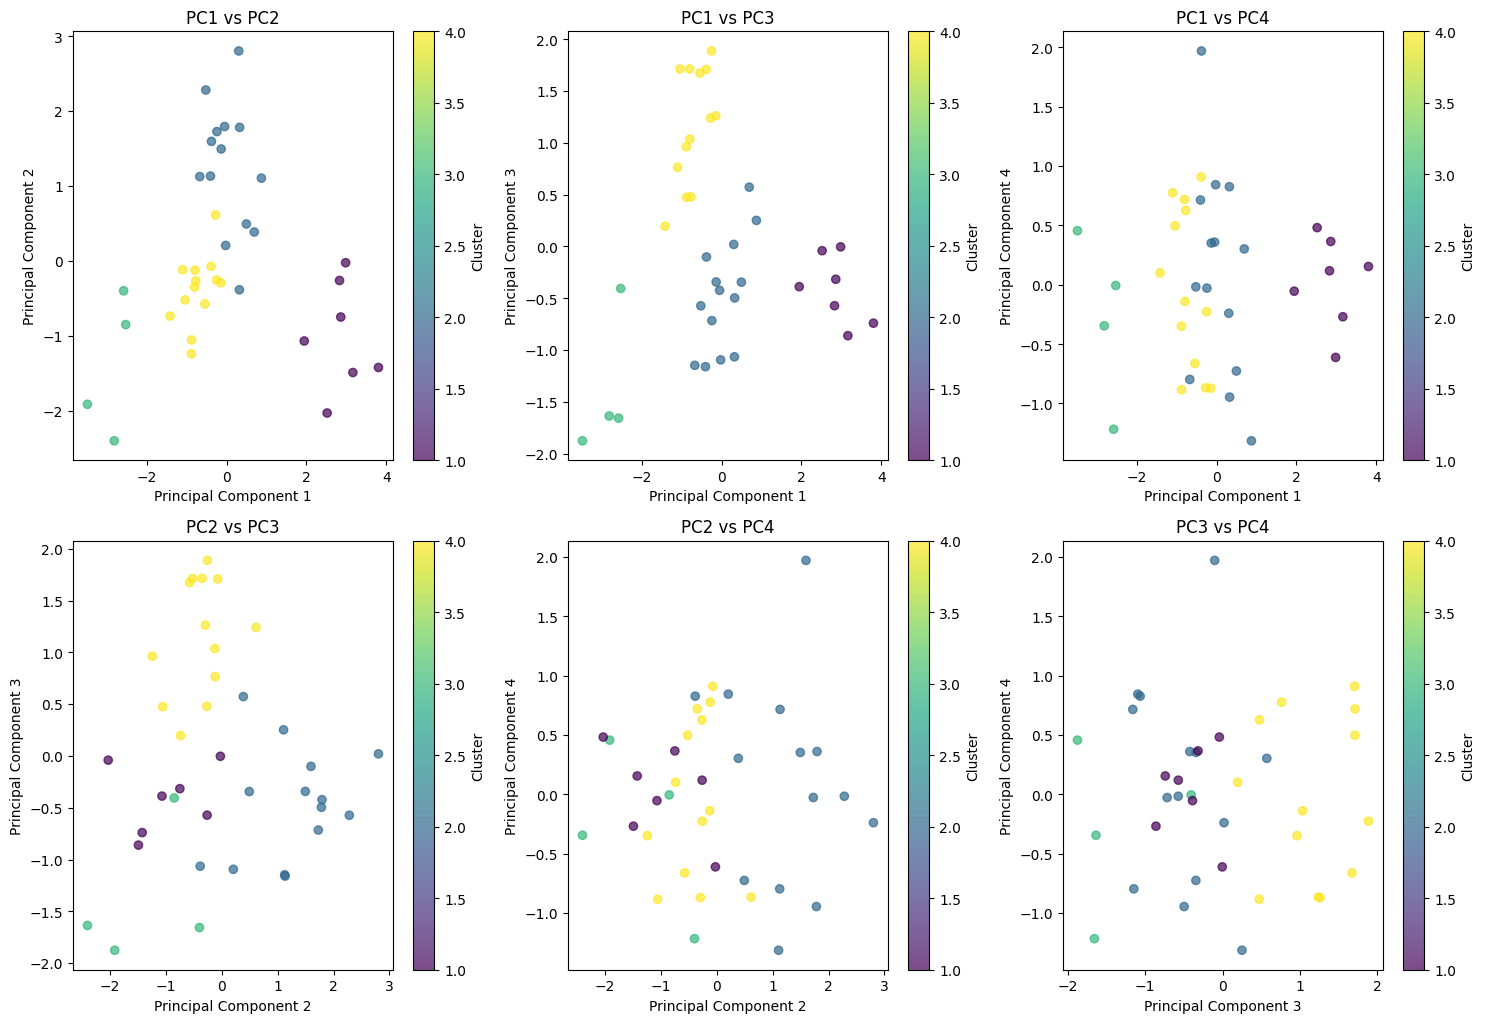

In [ ]:
import itertools


# generate all pairs of principal components
pairs = list(itertools.combinations(range(final_df.shape[1]), 2))

# Visualize clusters for all pairs of principal components
plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    plt.scatter(final_df.iloc[:, pc1].tolist(), final_df.iloc[:, pc2].tolist(), c=clustered_df.iloc[:,4].tolist(), cmap='viridis', alpha=0.7)
    plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

Tuning Linkage methods:

Silhouette Score for single linkage: 0.36800081184701366
Silhouette Score for complete linkage: 0.45690190637188294
Silhouette Score for average linkage: 0.45690190637188294
Silhouette Score for ward linkage: 0.45690190637188294


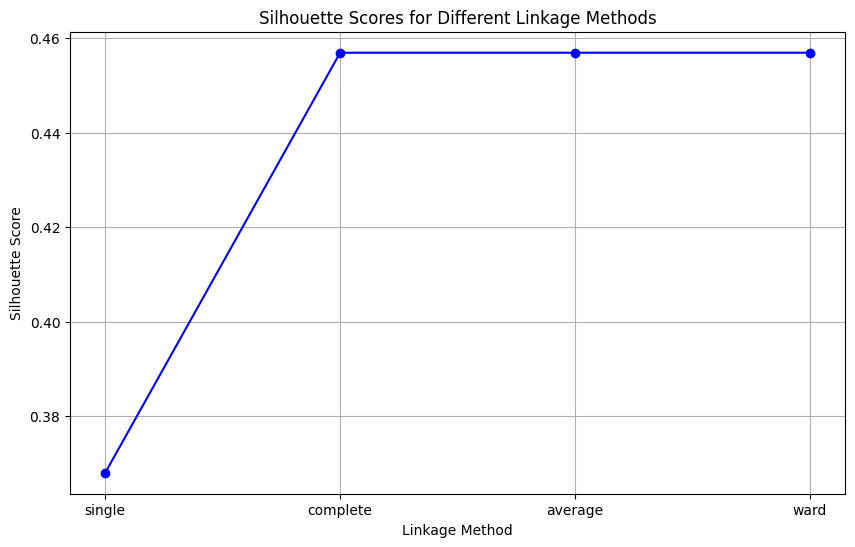

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

silhouette_scores = []

for method in linkage_methods:
    # hierarchical clustering
    linkage_matrix = linkage(final_df, method=method, metric='euclidean')

    num_clusters = 4
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    silhouette = silhouette_score(final_df, clusters)  # Based on cluster assignments
    silhouette_scores.append(silhouette)
    print(f"Silhouette Score for {method} linkage: {silhouette}")

# Plots
plt.figure(figsize=(10, 6))
plt.plot(linkage_methods, silhouette_scores, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.xlabel("Linkage Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Linkage Methods")
plt.grid(True)

plt.show()


Tuning using distance metrics

Silhouette Score for complete linkage with euclidean distance: 0.45690190637188294
Silhouette Score for complete linkage with cityblock distance: 0.4363203490268636
Silhouette Score for complete linkage with cosine distance: 0.37002492861819064
Silhouette Score for complete linkage with chebyshev distance: 0.41300823822669097


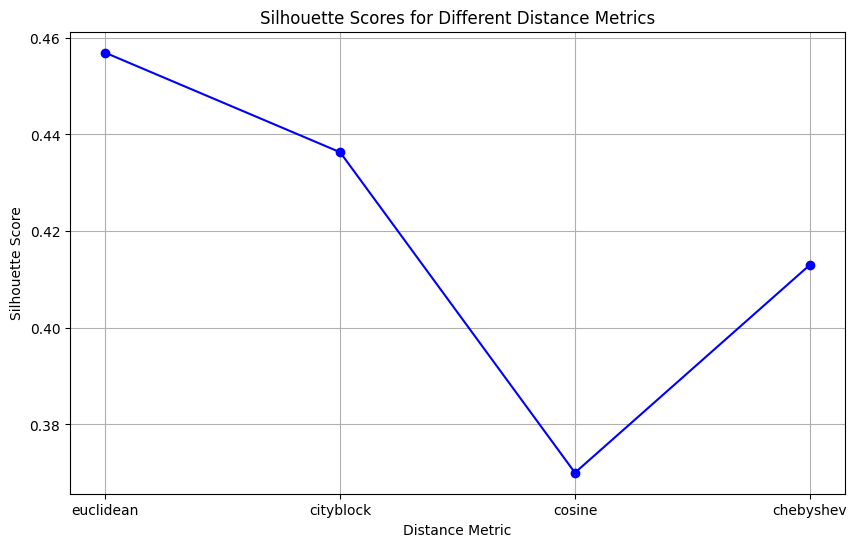

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine', 'chebyshev']


linkage_method = 'complete'  # experiment

silhouette_scores = []

for metric in distance_metrics:
    # hierarchical clustering
    linkage_matrix = linkage(final_df, method=linkage_method, metric=metric)

    num_clusters = 4
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    silhouette = silhouette_score(final_df, clusters)
    silhouette_scores.append(silhouette)
    print(f"Silhouette Score for {linkage_method} linkage with {metric} distance: {silhouette}")

plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, silhouette_scores, marker='o', linestyle='-', color='b')  # Line plot
plt.xlabel("Distance Metric")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Distance Metrics")
plt.grid(True)
plt.show()


Trying boostrapping and averaging over the point to get cluster label:

Cluster Stability:
    DataPoint  Cluster
0           0        2
1           1        2
2           2        2
3           3        4
4           4        4
5           5        4
6           6        4
7           7        4
8           8        3
9           9        4
10         10        3
11         11        4
12         12        2
13         13        4
14         14        4
15         15        4
16         16        4
17         17        4
18         18        4
19         19        2
20         20        4
21         21        4
22         22        2
23         23        4
24         24        4
25         25        4
26         26        4
27         27        4
28         28        4
29         29        2
30         30        4
31         31        1
32         32        1
33         33        1
34         34        1
35         35        1
36         36        1
37         37        1


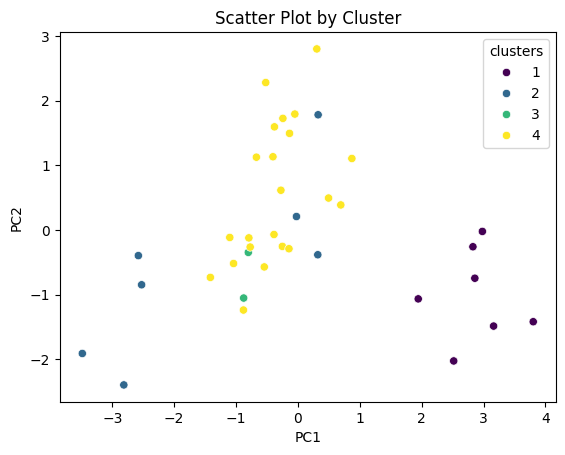

In [ ]:
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import pandas as pd

# Sample data with indices
data = final_df
data['DataPoint'] = data.index

# Function to resample data and get cluster assignments with indices
def bootstrap_clusters(data, num_clusters, num_samples=500):
    cluster_assignments = []

    for _ in range(num_samples):
        # Resample the data with original indices
        resampled_data = resample(data)

        # hierarchical clustering on resampled data
        linkage_matrix = linkage(resampled_data[['PC1', 'PC2', 'PC3', 'PC4']], method='ward')

        # get cluster assignments
        clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

        # Add original indices to cluster assignments
        cluster_assignments.append((resampled_data['DataPoint'].values, clusters))

    return cluster_assignments

num_clusters = 4

cluster_results = bootstrap_clusters(data, num_clusters, num_samples=100)

cluster_assignments = {i: [] for i in data['DataPoint']}

for indices, clusters in cluster_results:
    for idx, cluster in zip(indices, clusters):
        cluster_assignments[idx].append(cluster)

stability = [np.argmax(np.bincount(cluster_assignments[i])) for i in data['DataPoint']]

stability_df = pd.DataFrame({'DataPoint': data['DataPoint'], 'Cluster': stability})

print("Cluster Stability:")
print(stability_df)

data_clustered = data
data_clustered['clusters'] = stability
sns.scatterplot(data=data_clustered, x='PC1', y='PC2', hue='clusters', palette='viridis')  # Replace feature1 and feature2 with your actual features
plt.title("Scatter Plot by Cluster")
plt.show()

